In [17]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley import ShapNN
from DShap import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [18]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [19]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [20]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, 
              sources=None, 
              sample_weight=None,
              model_family=model, 
              metric='accuracy',
              overwrite=True,
              directory=directory, seed=0)
dshap.run(100, 0.1, g_run=False)

(100, 50)
(100,)
(5000, 50)
(5000,)
Starting LOO score calculations!
LOO values calculated!


100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


In [21]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:14<00:00,  6.96it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:14<00:00,  6.91it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.63it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.60it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.42it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:16<00:00,  6.19it/s]


In [22]:
print(dshap._calculate_loo_vals())

Starting LOO score calculations!
[ 0.     0.     0.009  0.     0.002 -0.001  0.     0.019  0.012  0.002
  0.002  0.     0.     0.004  0.001  0.     0.002  0.001  0.011  0.
 -0.002  0.     0.003  0.     0.011  0.     0.001  0.025  0.015  0.
 -0.001  0.002  0.026  0.004  0.007  0.    -0.002 -0.002  0.006  0.
 -0.006  0.023  0.008  0.     0.025  0.001  0.003 -0.001  0.017  0.005
  0.004  0.004 -0.001  0.     0.001 -0.002  0.005  0.     0.     0.
  0.003  0.001  0.     0.002  0.     0.     0.009  0.003  0.     0.
  0.003  0.012  0.     0.008  0.004  0.001  0.01   0.004  0.001 -0.001
  0.    -0.005  0.001  0.009 -0.003  0.004  0.006 -0.001 -0.002  0.
  0.001  0.002  0.003  0.    -0.001  0.028  0.008 -0.001  0.007  0.003]


In [23]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:15<00:00,  6.55it/s]


10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations


  0%|          | 0/100 [00:00<?, ?it/s]

100 out of 100 G-Shapley iterations


100%|██████████| 100/100 [00:16<00:00,  6.10it/s]


Now we merge results for the parallel runs:

In [24]:
dshap.merge_results()

./temp/mem_tmc_0001.pkl
./temp/mem_tmc_0000.pkl
./temp/mem_tmc_0002.pkl
./temp/mem_g_0002.pkl
./temp/mem_g_0000.pkl
./temp/mem_g_0001.pkl


Let's look at the convergence plots of the algorithms.

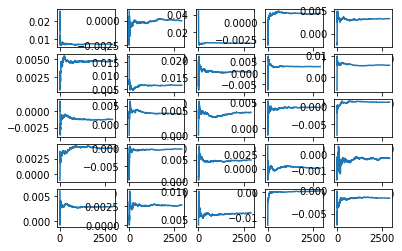

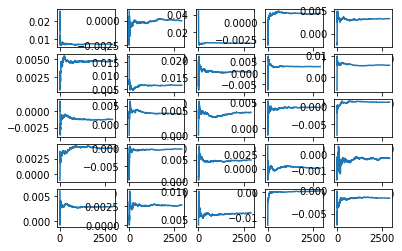

In [25]:
convergence_plots(dshap.marginals_tmc)

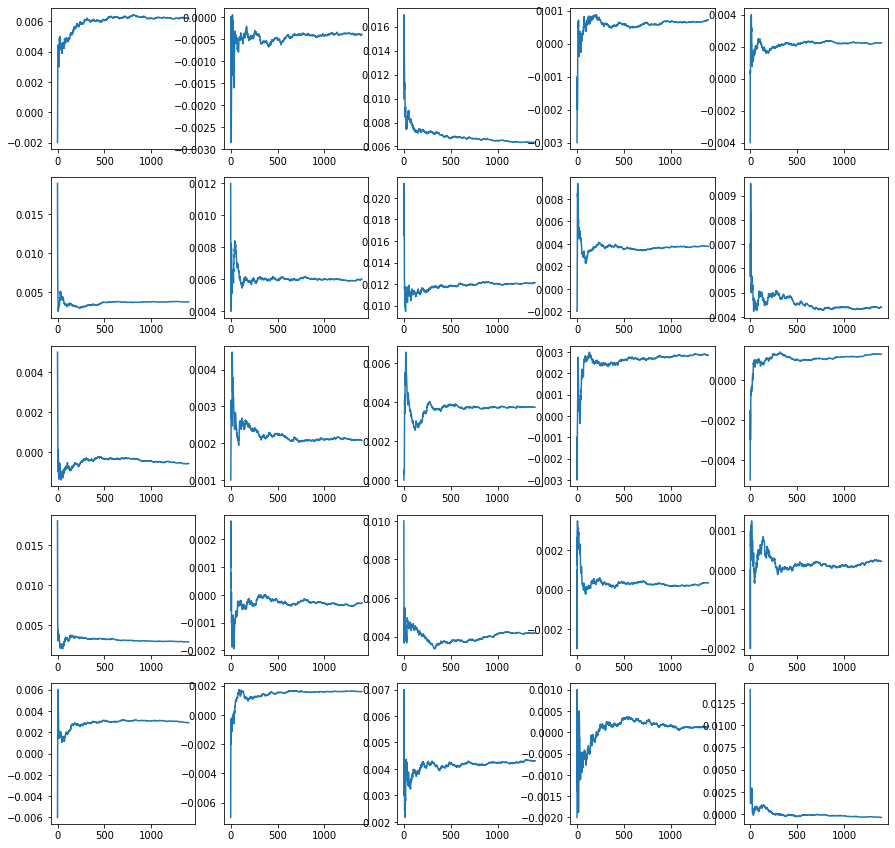

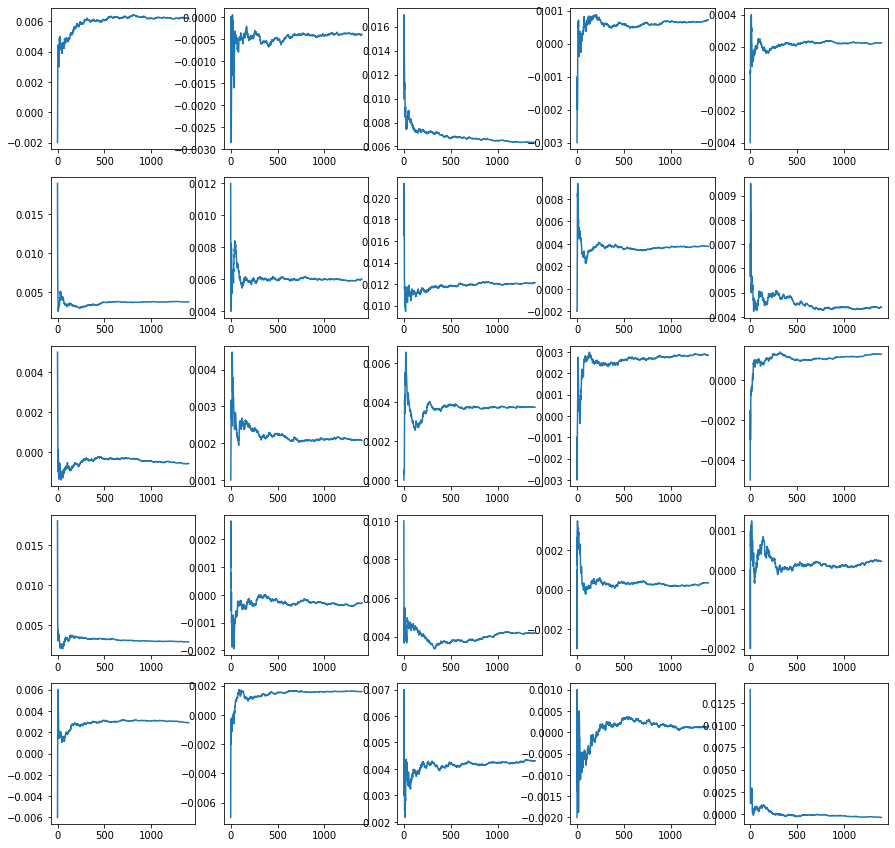

In [26]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

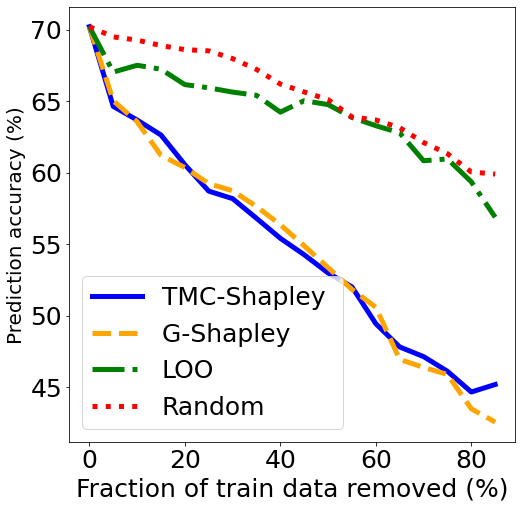

In [35]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)

In [34]:
print(dshap.vals_tmc)

[ 6.81111111e-03 -1.80000000e-04  7.14222222e-03  1.37555556e-03
  3.39555556e-03  4.73000000e-03  6.69666667e-03  1.62011111e-02
  2.81000000e-03  5.63111111e-03 -1.02666667e-03  2.57666667e-03
  4.80111111e-03  3.98777778e-03  1.14888889e-03  3.86444444e-03
  5.22222222e-05  5.26777778e-03 -3.07777778e-04 -3.33333333e-04
  3.02222222e-03  2.63444444e-03  6.54333333e-03  9.07777778e-04
 -1.90888889e-03  2.97222222e-03  3.01000000e-03  3.19333333e-03
  2.50111111e-03  5.21111111e-03  1.36444444e-03  2.96777778e-03
  1.20677778e-02  2.17333333e-03 -6.83555556e-03  1.84666667e-03
  5.35444444e-03 -4.11111111e-05  8.11666667e-03 -1.92888889e-03
 -1.06222222e-02  1.33400000e-02 -5.28777778e-03  4.40888889e-03
  4.84555556e-03 -2.33555556e-03  3.93555556e-03  5.65444444e-03
 -1.34333333e-03  6.05111111e-03 -1.09555556e-03  3.93222222e-03
 -1.10777778e-03  4.38666667e-03 -2.76666667e-04 -3.20333333e-03
  4.37000000e-03  1.99333333e-03  4.72222222e-04  3.32888889e-03
 -4.31222222e-03 -2.46222

In [33]:
print(dshap.vals_loo)

[ 0.     0.     0.009  0.     0.002 -0.001  0.     0.019  0.012  0.002
  0.002  0.     0.     0.004  0.001  0.     0.002  0.001  0.011  0.
 -0.002  0.     0.003  0.     0.011  0.     0.001  0.025  0.015  0.
 -0.001  0.002  0.026  0.004  0.007  0.    -0.002 -0.002  0.006  0.
 -0.006  0.023  0.008  0.     0.025  0.001  0.003 -0.001  0.017  0.005
  0.004  0.004 -0.001  0.     0.001 -0.002  0.005  0.     0.     0.
  0.003  0.001  0.     0.002  0.     0.     0.009  0.003  0.     0.
  0.003  0.012  0.     0.008  0.004  0.001  0.01   0.004  0.001 -0.001
  0.    -0.005  0.001  0.009 -0.003  0.004  0.006 -0.001 -0.002  0.
  0.001  0.002  0.003  0.    -0.001  0.028  0.008 -0.001  0.007  0.003]
